# Multidimensional Scaling

### Table of Contents

<br />
<br />
<br />

* Introduction
 * About This Notebook
 * About This Dataset
 * About Multidimensional Scaling
* Load the Data
* Multidimensional Scaling: 2 Dimensions
* Multidimensional Scaling: 3 Dimensions
* Sammon Mapping

<br />
<br />
<br />


## Introduction

### About This Notebook

Because of its similarities to PCA, this notebook will not implement multidimensional scaling "by hand," although it would be easy to do by simply replicating the steps in the PCA notebook. Rather, this notebook will utilize the multidimensional scaling functionality built into scikit-learn.

Warning: MDS takes much more wall time than PCA, so this notebook use a reduced data set and takes a lot longer than PCA.

### About This Dataset

This dataset is the NIST handwritten digit classification data set, a data set popular for its simplicity, and for being a nice introduction to image classification for machine learning appications.

### About Multidimensional Scaling

Suppose we have a set of $N$ points, and we know the distance between pairs of points $P_{ij}$ for $i, j = 1 \dots N$. However, we do not know the coordinates of the points or how the distances are calculated. Multidimensional scaling attempts to lower the dimensionality of the data set by reducing the number of dimensions, subject to the restriction that the distances between each of the points should be preserved in the lower dimensional space.

Thus, this is a method focused on preserving the norm of the distance between various points (preserving their relationships), rather than explaining the most amount of variance in the data possible. 

Suppose there is a sample $\mathbf{X}$ with $N$ points, and we're talking about a $d$-dimensional parameter space, $\mathbf{X}_i \in \mathfrak{R}^d$. In our case, the points are observations and the $d$-dimensional space is the pixel data. 

Then the the square of the Euclidean distance between two points $i$ and $j$ is:

$$
d_{ij}^2 = \| \mathbf{X}_i - \mathbf{X}_j \|^2
$$

We construct a matrix from the distance metric $\mathbf{B}$, similar to how PCA constructs a covariance matrix $\mathbf{C}$ from the variance metric. We can compute the eigenvalues of this distance matrix, $\mathbf{B}$

We find the eigenvalues and eigenvectors of $\mathbf{B}$, denoted $\lambda_j$ and $\mathbf{c}_j$, respectively. Next, we decide on a number of reduced dimensions $k$. Then the new dimension $z_j$ of our multidimensional scaling (where $j$ indexes the number of reduced dimensions $k$) is:

$$
\mathbf{z}_j = \sqrt{\lambda_j} \mathbf{c}_j
$$

where $j = 1, \dots, k$ is the index over the number of _reduced_ dimensions.

We can see that under the hood, PCA and MDS are very similar: they both perform an eigenvalue analysis of a matrix formed using a metric (covariance for PCA, Euclidean distances for MDS).

In [58]:
%matplotlib notebook

# numbers
import numpy as np
import pandas as pd

# stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import os, re
from pprint import pprint

## Load the Data

To load the data, we'll follow steps in the PCA notebook, including standardizing and normalizing it.

In [59]:
## No learning, no testing.
#testing_df = pd.read_csv('data/optdigits/optdigits.tes',header=None)
#X_testing,  y_testing  = testing_df.loc[:,0:63],  testing_df.loc[:,64]

training_df = pd.read_csv('data/optdigits/optdigits.tra',header=None)
X_training, y_training = training_df.loc[:,0:63], training_df.loc[:,64]

In [60]:
print X_training.shape
print y_training.shape

(3823, 64)
(3823,)


In [61]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    ## Automatic:
    #X_cov = np.cov(X_std.T)
    
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(X_training)

## Multidimensional Scaling: 2 Dimensions

Projecting the full 64-dimensional input to 2 dimensions will lead to a loss of a lot of information - similar to trying to use only 2 principal components. However, it's still useful to do it and visualize it to see what kind of results we'll get, and extend this approach to higher dimensions.

In [62]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [63]:
n_samples = 300
similarities = euclidean_distances(X_std[:n_samples])

In [64]:
#mds = manifold.MDS(n_components=2, max_iter=1000, eps=1e-3,
#                   n_jobs=1)
#pos = mds.fit(similarities).embedding_

In [65]:
def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('Set1')
    return[ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y_training]

In [66]:
#fig = plt.figure(figsize=(4,4))
#plt.scatter(pos[:,0],pos[:,1],c=colors)
#plt.show()

In [67]:
mds2 = manifold.MDS(n_components=2, max_iter=1000, eps=1e-3,
                   dissimilarity="precomputed", n_jobs=1)
pos2 = mds2.fit(similarities).embedding_

In [68]:
print pos2.shape

(300, 2)


<IPython.core.display.Javascript object>


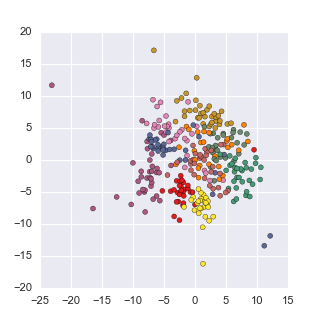

In [69]:
fig = plt.figure(figsize=(4,4))
plt.scatter(pos2[:,0],pos2[:,1],c=colors)
plt.show()

## Multidimensional Scaling: 3 Dimensions

Using a 3-component mutlidimensional scaling model and a 3D scatterplot leads to some improvement:

In [70]:
n_samples = 400
similarities = euclidean_distances(X_std[:n_samples])

In [71]:
mds3 = manifold.MDS(n_components=3, max_iter=1000, eps=1e-4,
                   dissimilarity="precomputed", n_jobs=1)
pos3 = mds3.fit(similarities).embedding_

In [72]:
print pos3.shape

(400, 3)


In [73]:
def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('Set1')
    return[ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y_training[:n_samples]]

<IPython.core.display.Javascript object>


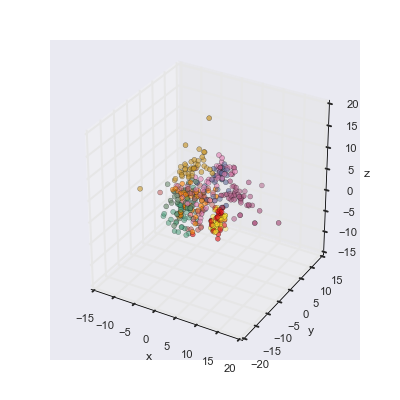

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(pos3[:,0],pos3[:,1],pos3[:,2],c=colors)
    
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

plt.show()

In [75]:
n_samples = 1000
similarities = euclidean_distances(X_std[:n_samples])

In [76]:
print X_std.shape

(3823, 64)


In [77]:
# XXXXXXXXXXXXXXXXXXXXXXXXX
# This takes a while.
# XXXXXXXXXXXXXXXXXXXXXXXXX
mds4 = manifold.MDS(n_components=4, max_iter=500, eps=1e-3,
                   dissimilarity="precomputed", n_jobs=1)
fit4 = mds4.fit(similarities)
pos4 = fit4.embedding_

In [78]:
def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('Set1')
    return[ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y_training[:n_samples]]

<IPython.core.display.Javascript object>


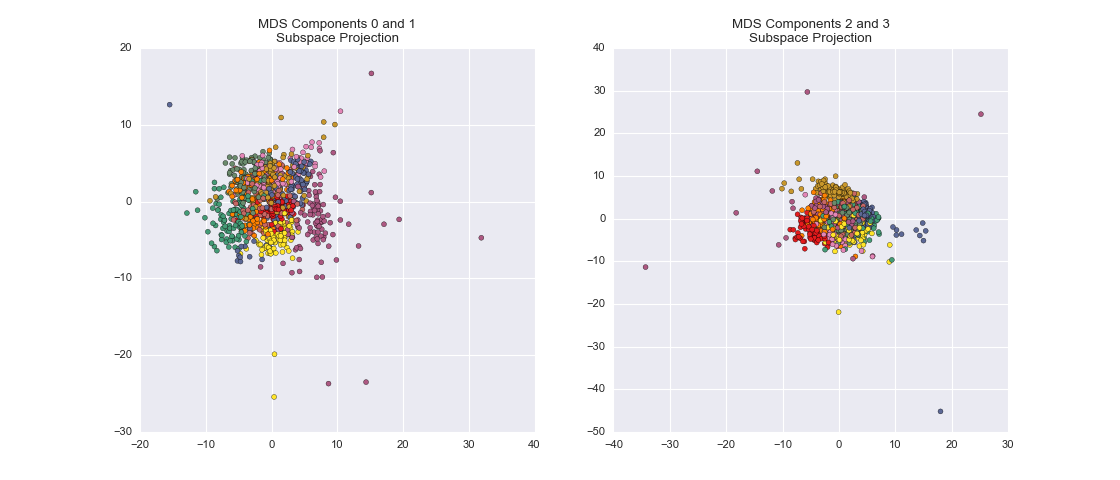

In [79]:
fig = plt.figure(figsize=(14,6))
ax1, ax2 = [fig.add_subplot(120 + i + 1) for i in range(2)]

ax1.scatter( pos4[:,0], pos4[:,1] , c=colors )
ax1.set_title('MDS Components 0 and 1\nSubspace Projection')

ax2.scatter( pos4[:,2], pos4[:,3] , c=colors )
ax2.set_title('MDS Components 2 and 3\nSubspace Projection')

plt.show()

<IPython.core.display.Javascript object>


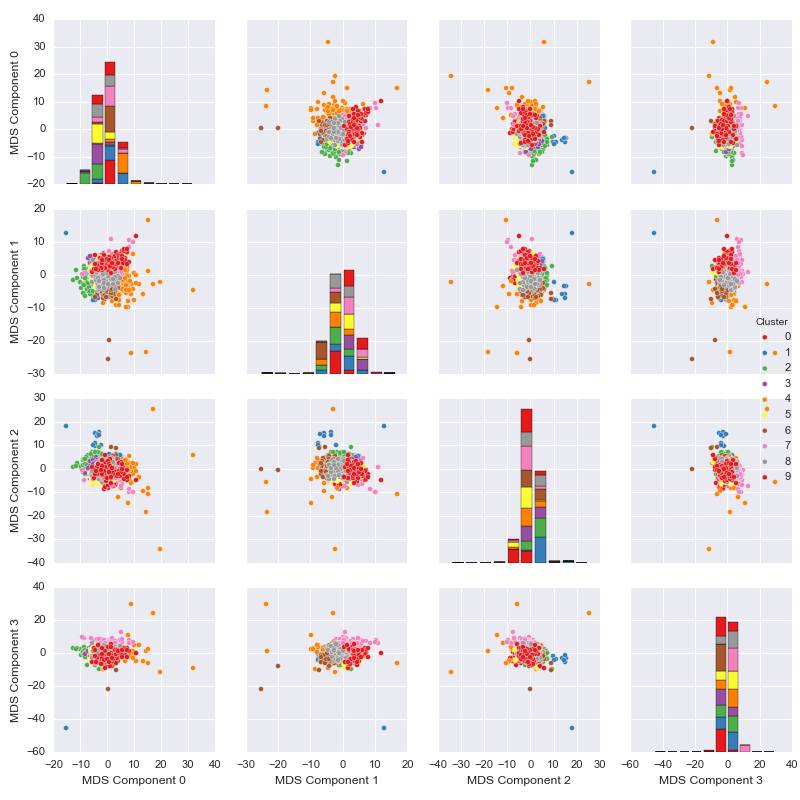

In [80]:
pairplot_df = pd.DataFrame(pos4, columns=['MDS Component '+str(j) for j in range(pos4.shape[1])])
pairplot_df.reindex(pairplot_df.columns.sort_values(ascending=True))
z_columns = pairplot_df.columns

pairplot_df['Cluster'] = y_training
pairplot_df = pairplot_df.sort_values('Cluster',ascending=True)
sns.pairplot(pairplot_df, hue='Cluster', 
             vars=z_columns, # don't plot the category/system response
             palette='Set1')

plt.show()

#######################################################
#
# This plot shows the subspace projections into the 
# dimensions resulting from Multidimensional Scaling (MDS)
#
#######################################################


So how does MDS shake out? Not so great. In addition to taking much more wall time, the projection subspaces show minimal segregation of data into clusters, with all of the data lumped around the centerpoint $(0,0)$. 

This should perhaps be revisited, to improve the MDS efficiency and clustering somehow. But for now the cost of building an MDS model with 1, then 2, then 3, then etc., then $k$ terms, is too damn high.

# Conclusion

That's all for now - we applied multidimensional scaling to optical digit classification, but saw that it wasn't doing as effective a job of segregating the classes in MDS component subspace as PCA, and had a higher wall time cost than PCA, so no more MDS for this data set.